<a href="https://colab.research.google.com/github/tjtmddnjswkd/capstone/blob/jc/p3_preprocessing_memo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 0.Data Load


In [1]:
import pandas as pd
import numpy as np
import os

try:
    gdrive_path = r'G:\내 드라이브\KB인턴관련'
except:
    gdrive_path = "/content/drive/MyDrive/KB인턴관련"

df_laws = pd.read_csv(os.path.join(
    gdrive_path, "export_crawl_1\\crawl_total.csv"), encoding='euc-kr')
df_expt = pd.read_csv(os.path.join(
    gdrive_path, "crawl_except.csv"), encoding='euc-kr')


In [2]:
df = pd.concat([df_laws, df_expt], axis=0).reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585976 entries, 0 to 585975
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  585976 non-null  object
 1   lawName   585976 non-null  object
 2   ENG       585976 non-null  object
 3   KOR       585946 non-null  object
dtypes: object(4)
memory usage: 17.9+ MB


# 1.Basic Preprocess


## 1.1.NaN Data


In [3]:
# 영어 NaN
df.loc[df.ENG.isna()]


,category,lawName,ENG,KOR


In [4]:
# 한글 NaN
df.loc[df.KOR.isna()]


,category,lawName,ENG,KOR
39667,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
39668,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
79104,통화ㆍ국채ㆍ금융,금융위원회의 설치 등에 관한 법률 시행령,Shares in expenses paid under Article 47 (1) o...,NaN
107052,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,(Market price as at the date stock option is g...,NaN
112590,상업ㆍ무역ㆍ공업,할부거래에 관한 법률 시행령,Amount to be reserved = (The amount received i...,NaN
170002,환경,가습기살균제 피해구제를 위한 특별법,Contribution = 100 billion won ×｛(usage ratio ...,NaN
187029,환경,환경영향평가법 시행령,[Area prescribed in subparagraph 1 / Minimum a...,NaN
232679,국가공무원,공무원연금법 시행령,[36 - (Number of months during which a pension...,NaN
288588,경찰,의무경찰대 설치 및 운영에 관한 법률 시행령,(Average base monthly income of all public off...,NaN
288589,경찰,의무경찰대 설치 및 운영에 관한 법률 시행령,(Average base monthly income of all public off...,NaN


- `KOR`이 `NaN`인 경우는 영어에 쌍으로 수집되는 데이터가 누락된 경우이기에 삭제 처리 함


In [5]:
df = df.dropna(subset=["KOR"], axis=0).reset_index(drop=True)


## 1.2.어절을 통한 회귀로 무결성 검증 절차 생각해보기


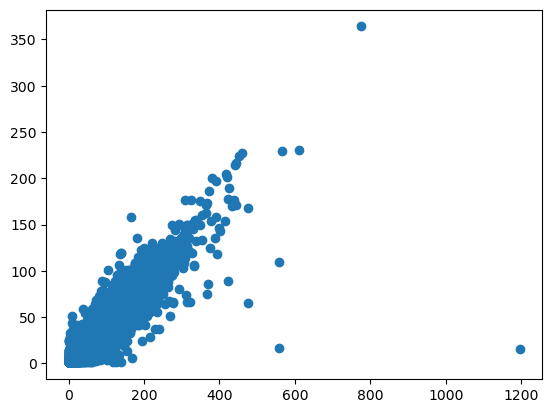

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df.ENG.apply(lambda x: len(x.split(" "))),
            df.KOR.apply(lambda x: len(x.split(" "))))

plt.show()


In [7]:
import statsmodels.api as sm

x = df.ENG.apply(lambda x: len(x.split(" ")))
y = df.KOR.apply(lambda x: len(x.split(" ")))
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    KOR   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 5.467e+06
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:07:14   Log-Likelihood:            -1.6263e+06
No. Observations:              585946   AIC:                         3.253e+06
Df Residuals:                  585944   BIC:                         3.253e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7042      0.008    213.025      0.000       1.689       1.720
ENG            0.4319      0.000   2338.138      0.000       0.432       0.432
==============================================================================
Omnibus:                   639769.795   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6409536486.102
Skew:                          -4.095   Prob(JB):                         0.00
Kurtosis:                     515.312   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y_hat = x.ENG.apply(lambda x: 1.7042+0.4319*x)
y_hat


0         31.0734
1          9.4784
2         15.0931
3         17.6845
4         13.3655
           ...   
585941     9.0465
585942    49.6451
585943    13.3655
585944     8.1827
585945     2.5680
Name: ENG, Length: 585946, dtype: float64

In [9]:
res_square = (y_hat-y).apply(lambda x: x**2).sort_values(ascending=False)


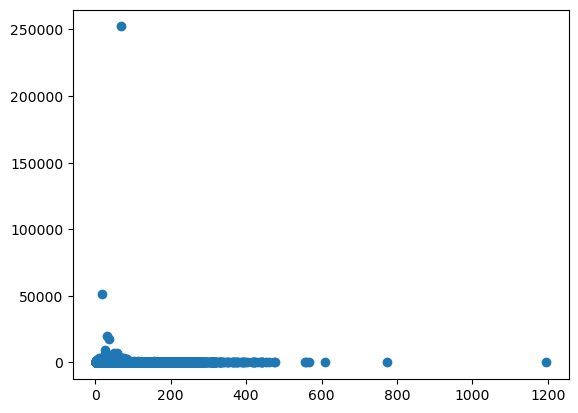

In [10]:
plt.scatter(x.ENG, res_square)
plt.show()


Q1: -0.020388698126347967	Q3: 1.0934800504185453


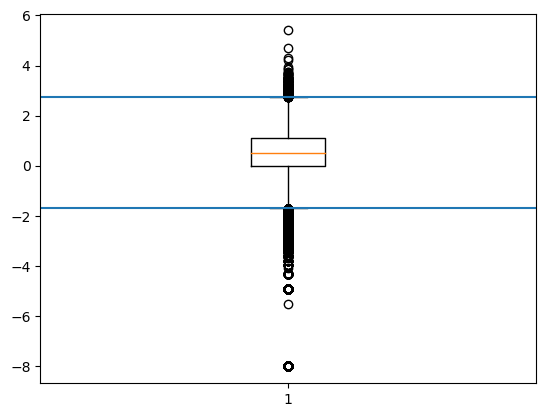

In [11]:
plt.boxplot(np.log10(res_square))
q1, q3 = np.quantile(np.log10(res_square), 0.25), np.quantile(
    np.log10(res_square), 0.75)
print(f"Q1: {q1}\tQ3: {q3}")
IQR = 1.5*(q3-q1)
plt.axhline(q1-IQR)
plt.axhline(q3+IQR)
plt.show()


In [12]:
df_up = df.loc[res_square > 50000]


In [13]:
df_down = df.loc[res_square.apply(lambda x: np.log10(x)) < q1-IQR]


- 띄어쓰기 단위로 완전히 동떨어진 문장들은 찾을 수 있음
- 그러나 이를 활용하여 <span style="color:cyan">**번역 쌍의 무결성**</span>을 검증할 수는 없음


## 1.3.`konlpy`를 통해 검증해 보기


In [14]:
from konlpy.tag import Okt, Kkma

okt = Okt()
kkma = Kkma()
text = "설치가 완료 되었습니까? 안된다면 다시 시도해 주세요."
print(okt.morphs(text))
print(okt.nouns(text))


['설치', '가', '완료', '되었습니까', '?', '안된다면', '다시', '시도', '해', '주세요', '.']
['설치', '완료', '다시', '시도']


In [15]:
if "num_of_noun_kor.csv" not in os.listdir(os.path.join(gdrive_path, 'etc_files')):
    num_of_noun_kor = df.KOR.apply(lambda x: len(okt.nouns(x)))
    num_of_noun_kor.to_csv(os.path.join(
        gdrive_path, "etc_files/num_of_noun_kor.csv"))
else:
    num_of_noun_kor = pd.read_csv(os.path.join(
        gdrive_path, "etc_files/num_of_noun_kor.csv"), index_col=0)
    num_of_noun_kor = pd.Series(
        data=num_of_noun_kor.KOR, index=num_of_noun_kor.index)
num_of_noun_kor


0         39
1          7
2         18
3         24
4         19
          ..
585941     8
585942    59
585943    14
585944     5
585945     1
Name: KOR, Length: 585946, dtype: int64

In [16]:
# 명사 1개 전부 삭제
one_noun_index = (num_of_noun_kor == 1)
df.loc[one_noun_index].sort_values(
    by="KOR", key=lambda col: col.apply(len), ascending=False).head()


,category,lawName,ENG,KOR
354157,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"2. For the period from June 1, 2005 to June 21...",2. 2005년 6월 1일부터 2012년 6월 21일까지 기간분: 1일 10만분의 29
354156,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"1. For the period from April 1, 1999 to May 31...",1. 1999년 4월 1일부터 2005년 5월 31일까지 기간분: 1일 1만분의 4
265763,형사법,형사소송법,"[92 Hun-Ga 8, Dec. 24, 1992 (Act No. 5054, Dec...",[92헌가8 1992. 12. 24.(1995. 12. 29. 法5054)]
264744,형사법,형사소송법,"[93 Hun-Ga2, Dec. 23, 1993 (Act No. 2450, Jan....",[93헌가2 1993. 12. 23.(1973. 1. 25. 法2450)]
536032,환경,물환경보전법 시행령,10. Polychlorinated biphenyl;,10. 폴리염화비페닐[polychlorinated biphenyl]


In [17]:
# 명사 2개 전부 삭제
noun_index = (num_of_noun_kor == 2)
df.loc[noun_index].sort_values(
    by="KOR", key=lambda col: col.apply(len), ascending=False).head()


,category,lawName,ENG,KOR
44824,교육ㆍ학술,교육공무원법,2. For a person whose date of birth arrives be...,2. 1934년 3월 1일부터 1937년 8월 31일까지의 기간중에 있는 자: 19...
280176,지방제도,지방세특례제한법,2. Acquisition tax shall be reduced by 50/100 ...,2. 2021년 1월 1일부터 2021년 12월 31일까지는 취득세의 100분의 5...
555218,노동,산업안전보건법 시행령,7. Yellow phosphorus [12185-10-3] match;,7. 황린(黃燐)[12185-10-3] 성냥(Yellow phosphorus match)
232066,국가공무원,공무원수당 등에 관한 규정,"[Title Amended on Dec. 11, 2013; Dec. 16, 2013...","[제목개정 2013. 12. 11., 2013. 12. 16., 2020. 6. 23.]"
499524,수자원·토지·건설,건설기술 진흥법,"[Title Amended on Dec. 31, 2018; Apr. 30, 2019...","[제목개정 2018. 12. 31., 2019. 4. 30., 2021. 3. 16.]"


In [18]:
# 명사 4개 전부 삭제
import re

less_noun_index = (num_of_noun_kor < 2)
df_temp = df.loc[less_noun_index].sort_values(by="KOR", key=lambda col: col.apply(
    lambda x: len(re.sub("[^ㄱ-ㅎ|가-힣]", "", x))), ascending=False)
df_temp.head()


,category,lawName,ENG,KOR
354156,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"1. For the period from April 1, 1999 to May 31...",1. 1999년 4월 1일부터 2005년 5월 31일까지 기간분: 1일 1만분의 4
354157,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"2. For the period from June 1, 2005 to June 21...",2. 2005년 6월 1일부터 2012년 6월 21일까지 기간분: 1일 10만분의 29
261131,형사법,소년법,(1) The trial shall be conducted in a spirit o...,① 심리는 친절하고 온화하게 하여야 한다.
299181,군사,군사법원법,"(4) To make an oath, one shall rise to his/her...",④ 선서는 일어서서 엄숙하게 하여야 한다.
264912,형사법,형사소송법,(4) The oath shall be taken solemnly in the st...,④ 선서는 일어서서 엄숙하게 하여야 한다.


In [19]:
re.sub("[^ㄱ-ㅎ|가-힣]", "", "② 보육은 영유아가 안전하고 쾌적한 환경에서 건강하게 성장할 수 있도록 하여야 한다.")


'보육은영유아가안전하고쾌적한환경에서건강하게성장할수있도록하여야한다'

In [20]:
import string

if "okt_pos_srs.csv" not in os.listdir(os.path.join(gdrive_path, 'etc_files')):
    okt_pos_srs = df.KOR.apply(lambda x: okt.pos(
        x.translate(str.maketrans("", "", string.punctuation))))
    okt_pos_srs.to_csv(os.path.join(
        gdrive_path, "etc_files/okt_pos_srs.csv"), encoding='euc-kr')
else:
    okt_pos_srs = pd.read_csv(os.path.join(
        gdrive_path, "etc_files/okt_pos_srs.csv"), encoding='euc-kr').KOR
okt_pos_srs


0         [('이', 'Noun'), ('법', 'Noun'), ('은', 'Josa'), ...
1         [('이', 'Noun'), ('법', 'Noun'), ('에서', 'Josa'),...
2         [('1', 'Number'), ('“', 'Foreign'), ('개성', 'No...
3         [('2', 'Number'), ('“', 'Foreign'), ('개성', 'No...
4         [('3', 'Number'), ('“', 'Foreign'), ('개성', 'No...
                                ...                        
585941    [('①', 'Foreign'), ('시행일', 'Noun'), ('이', 'Nou...
585942    [('②', 'Foreign'), ('해외', 'Noun'), ('이', 'Dete...
585943    [('③', 'Foreign'), ('벌칙', 'Noun'), ('에', 'Josa...
585944    [('①', 'Foreign'), ('이', 'Noun'), ('법', 'Noun'...
585945                   [('②', 'Foreign'), ('생략', 'Noun')]
Name: KOR, Length: 585946, dtype: object

In [21]:
def change_str_to_numpy(temp):
    # temp = okt_pos_srs[0]
    pattern = r'\[|\]|\(|\'|\)'
    temp_arr = np.array(re.sub(pattern, "", temp).split(", "))
    return temp_arr.reshape(-1, 2)


In [22]:
okt_pos_srs = okt_pos_srs.apply(change_str_to_numpy)


In [23]:
from collections import Counter
verb_srs = okt_pos_srs.apply(lambda x: Counter(x[:, 1])["Verb"])


In [24]:
df_not_verb = df[verb_srs == 0].sort_values(
    by="KOR", ascending=False, key=lambda col: col.apply(len))
df_not_verb.head(10)


,category,lawName,ENG,KOR
95250,축산,축산물 위생관리법,1. Where he or she violates Articles 4 (6) and...,"1. 제4조제6항ㆍ제7항, 제5조제2항, 제8조제2항, 제9조제2항ㆍ제3항, 제9조..."
250368,민사법,상법,"(2) The provisions of Articles 209, 210, 366 (...","② 제209조, 제210조, 제366조제2항ㆍ제3항, 제367조, 제373조제2항,..."
287049,경찰,도로교통법,"2. Articles 34-3, 44, 47, 48, 50 (1), (2), (4)...","2. 제34조의3, 제44조, 제47조, 제48조, 제50조제1항ㆍ제2항ㆍ제4항ㆍ제..."
338353,과학ㆍ기술,국가초고성능컴퓨터 활용 및 육성에 관한 법률,3. The Minister of Science and ICT: Policies t...,"3. 과학기술정보통신부장관: 국가초고성능컴퓨팅 응용 분야 연구개발 지원, 기본계획과..."
78901,통화ㆍ국채ㆍ금융,금융소비자 보호에 관한 법률,"1. Article 10, Article 11, Article 12 (1), (2)...","1. 제10조, 제11조, 제12조제1항ㆍ제2항ㆍ제4항부터 제6항까지, 제13조부터..."
378403,내국세,소득세법 시행령,"2. The amended provisions of Articles 3-2, 180...","2. 제3조의2, 제180조의2제2항, 제207조의2제1항ㆍ제8항, 제207조의8제..."
371667,내국세,부가가치세법 시행령,"1. The amended provisions of Articles 70 (3), ...","1. 제70조제3항, 제71조제2항, 제71조의2제1항, 제73조제1항(제13호는 ..."
192157,노동,근로기준법,"1. A person who violates Articles 10, 22 (1), ...","1. 제10조, 제22조제1항, 제26조, 제50조, 제51조의2제2항, 제52조제..."
286962,경찰,도로교통법,2. Administrative fines provided for in Articl...,"2. 제160조제1항(제52조제1항ㆍ제3항을 위반한 경우만 해당한다), 제2항(제4..."
250105,민사법,상법,"(2) The provisions of Articles 362, 363-2, 366...","② 제362조, 제363조의2, 제366조, 제367조, 제373조, 제376조, ..."


In [25]:
not_verb_index = df_not_verb.index
df.drop(index=not_verb_index)


,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,"이 법에서 사용하는 용어의 정의는 다음과 같다. <개정 2009. 1. 30., 2..."
2,헌법,개성공업지구 지원에 관한 법률,1. The term “Gaeseong Industrial Complex” or “...,1. “개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 ...
3,헌법,개성공업지구 지원에 관한 법률,2. The term “GIC developer” means a South Kore...,2. “개성공업지구 개발업자”란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인...
4,헌법,개성공업지구 지원에 관한 법률,3. The term “GIC management organ” means a cor...,3. “개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공...
...,...,...,...,...
585939,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포한 날부터 시행한다.
585940,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의...
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585942,외무,해외이주법,(2) (Transitional Measures on Emigration Agent...,② (해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이...


In [26]:
okt.pos("밥을 먹는 사람이 있다")


[('밥', 'Noun'),
 ('을', 'Josa'),
 ('먹는', 'Verb'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('있다', 'Adjective')]

## 1.4.`nltk`를 통해 검증해 보기


In [27]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yunjc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yunjc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
from nltk import word_tokenize, pos_tag, sent_tokenize

sentences = "Tom was born in Toronto, 2020"
word_result = pos_tag(word_tokenize(sentences))
sent_result = pos_tag(sent_tokenize(sentences))

print(word_result)
print(sent_result)
# [('Tom', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Toronto', 'NNP'), (',', ','), ('2020', 'CD')]


[('Tom', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Toronto', 'NNP'), (',', ','), ('2020', 'CD')]
[('Tom was born in Toronto, 2020', 'NN')]


In [29]:
if "nltk_tokens.npy" not in os.listdir(os.path.join(gdrive_path, "etc_files")):
    eng_pos_token = df.ENG.apply(lambda x: pos_tag(word_tokenize(x)))
    eng_pos_token = eng_pos_token.apply(lambda x: np.array(x).reshape(-1, 2))
else:
    eng_pos_token = pd.Series(np.load(os.path.join(gdrive_path, "etc_files/nltk_tokens.npy"), allow_pickle=True))
eng_pos_token

0         [[The, DT], [purpose, NN], [of, IN], [this, DT...
1         [[The, DT], [terms, NNS], [used, VBN], [in, IN...
2         [[1, CD], [., .], [The, DT], [term, NN], [“, N...
3         [[2, CD], [., .], [The, DT], [term, NN], [“, N...
4         [[3, LS], [., .], [The, DT], [term, NN], [“, N...
                                ...                        
585941    [[(, (], [1, CD], [), )], [(, (], [Enforcement...
585942    [[(, (], [2, CD], [), )], [(, (], [Transitiona...
585943    [[(, (], [3, CD], [), )], [(, (], [Transitiona...
585944    [[(, (], [1, CD], [), )], [This, DT], [Act, NN...
585945    [[(, (], [2, CD], [), )], [Omitted, VBN], [., .]]
Length: 585946, dtype: object

In [30]:
eng_pos_counter = eng_pos_token.apply(lambda x: Counter(x[:, 1]))


In [31]:
verb_list = [
    "VBD", "VBP", "VBZ",
    "VHD", "VHP", "VHZ",
    "VVD", "VVP", "VVZ"
]
zero_verb = (eng_pos_counter.apply(
    lambda x: sum([x[t] for t in verb_list])) == 0)
df.loc[zero_verb]


,category,lawName,ENG,KOR
7,헌법,개성공업지구 지원에 관한 법률,5. The term “entry and exit” or “stay” shall h...,5. “출입” 또는 “체류”란 「개성공업지구와 금강산관광지구의 출입 및 체류에 관한...
8,헌법,개성공업지구 지원에 관한 법률,6. Other terms not defined otherwise in this A...,6. 이 법에서 별도로 정의되지 아니한 용어는 「남북교류협력에 관한 법률」및 「남북...
9,헌법,개성공업지구 지원에 관한 법률,(1) The Government shall formulate and impleme...,① 정부는 개성공업지구를 국제적인 공업지구로 육성ㆍ발전시키기 위한 시책을 수립ㆍ시행...
10,헌법,개성공업지구 지원에 관한 법률,(2) The Government shall create conditions nec...,② 정부는 개성공업지구의 개발과 기업의 경영활동이 경제원리와 기업의 자율성을 바탕으...
11,헌법,개성공업지구 지원에 관한 법률,"(3) In developing the GIC, the Government shal...",③ 정부는 개성공업지구를 개발함에 있어서 남북한 주민의 복리증진과 산업안전을 위한 ...
...,...,...,...,...
585937,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 1984년 1월 1일부터 시행한다.
585939,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포한 날부터 시행한다.
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585944,외무,해외이주법,(1) This Act shall enter into force three mont...,① 이 법은 공포한 날부터 시행한다.


## 1.5.kiwi를 통해 검증해 보기

In [40]:
from kiwipiepy import Kiwi
kiwi = Kiwi(num_workers=0)
kiwi.tokenize("① 대통령")
kiwi.split_into_sents("이는 정렬된 용어임")

[Sentence(text='이는 정렬된 용어임', start=0, end=10, tokens=None, subs=[])]

In [41]:
kiwi_tokens = df.KOR.apply(lambda x: kiwi.tokenize(x))
kiwi_tokens

0         [(이, MM, 0, 1), (법, NNG, 2, 1), (은, JX, 3, 1),...
1         [(이, MM, 0, 1), (법, NNG, 2, 1), (에서, JKB, 3, 2...
2         [(1., SN, 0, 2), (“, SSO, 3, 1), (개성공업지구, NNP,...
3         [(2., SN, 0, 2), (“, SSO, 3, 1), (개성공업지구, NNP,...
4         [(3., SN, 0, 2), (“, SSO, 3, 1), (개성공업지구, NNP,...
                                ...                        
585941    [(①, SW, 0, 1), ((, SSO, 2, 1), (시행일, NNG, 3, ...
585942    [(②, SW, 0, 1), ((, SSO, 2, 1), (해외, NNG, 3, 2...
585943    [(③, SW, 0, 1), ((, SSO, 2, 1), (벌칙, NNG, 3, 2...
585944    [(①, SW, 0, 1), (이, MM, 2, 1), (법, NNG, 4, 1),...
585945                     [(②, SW, 0, 1), (생략, NNG, 2, 2)]
Name: KOR, Length: 585946, dtype: object

In [49]:
kiwi_counter = kiwi_tokens.apply(lambda tokens: Counter([t.tag for t in tokens]))
kiwi_counter

0         {'MM': 1, 'NNG': 25, 'JX': 1, 'NNP': 4, 'JKG':...
1         {'MM': 1, 'NNG': 6, 'JKB': 2, 'XSV': 1, 'ETM':...
2         {'SN': 1, 'SSO': 1, 'NNP': 4, 'SSC': 1, 'VCP':...
3         {'SN': 1, 'SSO': 3, 'NNP': 5, 'NNG': 14, 'SSC'...
4         {'SN': 1, 'SSO': 2, 'NNP': 4, 'NNG': 8, 'SSC':...
                                ...                        
585941    {'SW': 1, 'SSO': 1, 'NNG': 7, 'SSC': 1, 'MM': ...
585942    {'SW': 1, 'SSO': 1, 'NNG': 50, 'JKB': 12, 'VV'...
585943    {'SW': 1, 'SSO': 1, 'NNG': 11, 'JKB': 4, 'VV':...
585944    {'SW': 1, 'MM': 1, 'NNG': 4, 'JX': 2, 'XSV': 2...
585945                                  {'SW': 1, 'NNG': 1}
Name: KOR, Length: 585946, dtype: object

In [54]:
not_ef_tags = df.loc[kiwi_counter.apply(lambda x: x["EF"]) == 0]

In [69]:
candidate_del = not_ef_tags.sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))
candidate_del

,category,lawName,ENG,KOR
580057,정보통신,전기통신사업법,"1. Where he or she violates Article 3, 4, 4-2,...","1. 제3조, 제4조, 제4조의2, 제6조, 제9조부터 제11조까지, 제14조부터 ..."
192920,노동,기간제 및 단시간근로자 보호 등에 관한 법률 시행령,2. An agency of the State and a local governme...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
559089,노동,파견근로자 보호 등에 관한 법률 시행령,2. State agencies and local government agencie...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
485654,국토개발·도시,새만금사업 추진 및 지원에 관한 특별법,22. Duties regarding the public notification o...,"22. 「공간정보의 구축 및 관리 등에 관한 법률」 제8조제4항ㆍ제5항, 제25조,..."
192204,노동,근로기준법,1. Business or workplaces regularly employing ...,"1. 상시 300명 이상의 근로자를 사용하는 사업 또는 사업장, 「공공기관의 운영에..."
...,...,...,...,...
374434,내국세,소득세법,3.,3.
175759,환경,소음·진동관리법,4.,4.
371877,내국세,상속세 및 증여세법,1.,1.
371099,내국세,부가가치세법 시행령,3.,3.


In [71]:
kiwi.tokenize("1. 법원이 지정하는 일시ㆍ장소에 출석하고 증거를 인멸하지 아니하겠다는 서약서를 제출할 것")

[Token(form='1.', tag='SN', start=0, len=2),
 Token(form='법원', tag='NNG', start=3, len=2),
 Token(form='이', tag='JKS', start=5, len=1),
 Token(form='지정', tag='NNG', start=7, len=2),
 Token(form='하', tag='XSV', start=9, len=1),
 Token(form='는', tag='ETM', start=10, len=1),
 Token(form='일시', tag='NNG', start=12, len=2),
 Token(form='ㆍ', tag='SW', start=14, len=1),
 Token(form='장소', tag='NNG', start=15, len=2),
 Token(form='에', tag='JKB', start=17, len=1),
 Token(form='출석', tag='NNG', start=19, len=2),
 Token(form='하', tag='XSV', start=21, len=1),
 Token(form='고', tag='EC', start=22, len=1),
 Token(form='증거', tag='NNG', start=24, len=2),
 Token(form='를', tag='JKO', start=26, len=1),
 Token(form='인멸', tag='NNG', start=28, len=2),
 Token(form='하', tag='XSV', start=30, len=1),
 Token(form='지', tag='EC', start=31, len=1),
 Token(form='아니하', tag='VX', start=33, len=3),
 Token(form='겠', tag='EP', start=36, len=1),
 Token(form='다는', tag='ETM', start=37, len=2),
 Token(form='서약서', tag='NNG', star

In [84]:
not_efetn_tags = df.loc[kiwi_counter.apply(lambda x: x["EF"]+x["ETN"])==0]
cdel2 = not_efetn_tags.sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))
cdel2

,category,lawName,ENG,KOR
580057,정보통신,전기통신사업법,"1. Where he or she violates Article 3, 4, 4-2,...","1. 제3조, 제4조, 제4조의2, 제6조, 제9조부터 제11조까지, 제14조부터 ..."
559089,노동,파견근로자 보호 등에 관한 법률 시행령,2. State agencies and local government agencie...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
192920,노동,기간제 및 단시간근로자 보호 등에 관한 법률 시행령,2. An agency of the State and a local governme...,"2. 국가 및 지방자치단체의 기관, 「공공기관의 운영에 관한 법률」 제5조에 따라 ..."
485654,국토개발·도시,새만금사업 추진 및 지원에 관한 특별법,22. Duties regarding the public notification o...,"22. 「공간정보의 구축 및 관리 등에 관한 법률」 제8조제4항ㆍ제5항, 제25조,..."
192204,노동,근로기준법,1. Business or workplaces regularly employing ...,"1. 상시 300명 이상의 근로자를 사용하는 사업 또는 사업장, 「공공기관의 운영에..."
...,...,...,...,...
371097,내국세,부가가치세법 시행령,1.,1.
371098,내국세,부가가치세법 시행령,2.,2.
371099,내국세,부가가치세법 시행령,3.,3.
374434,내국세,소득세법,3.,3.


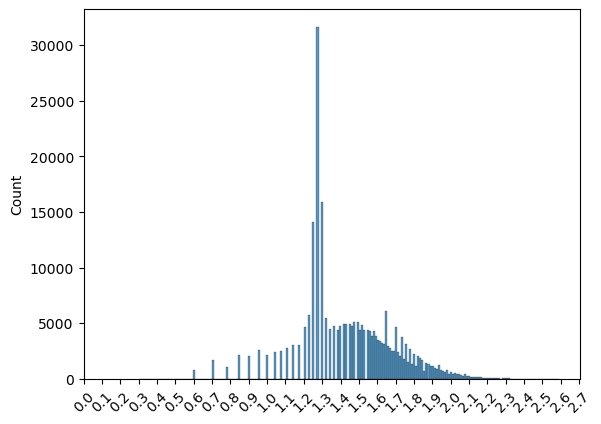

In [88]:
import seaborn as sns

sns.histplot(np.log10(cdel2.KOR.apply(len).values))
plt.xticks([i/10 for i in range(0, 28)], rotation=45)
plt.show()

In [117]:
df_droped=df.drop(index=cdel2.index).sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

In [119]:
df_droped.loc[df_droped.ENG.str.contains("Omitted")]

,category,lawName,ENG,KOR
86048,통화ㆍ국채ㆍ금융,한국수출입은행법,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, 증권투자신탁업법 ..."
284875,경찰,경비업법 시행령,"""Key national establishments ... <Omitted> ......",경비업법(이하 “법”이라 한다) 제2조제1호마목에서 “대통령령이 정하는 국가중요시설...
35281,민방위ㆍ소방,위험물안전관리법 시행령,(3) “Person ... <Omitted> ... who is prescribe...,③ 법 제15조제1항 단서에서 “대통령령이 정하는 자”란 다음 각 호의 어느 하나에...
277377,지방제도,지방세기본법,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
30213,지방제도,지방자치단체를 당사자로 하는 계약에 관한 법률,(1) This Act shall enter into force on the dat...,"① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 ..."
...,...,...,...,...
361502,내국세,개별소비세법,(1) through (7) Omitted.,① 농어촌특별세법중 다음과 같이 개정한다.
361503,내국세,개별소비세법,(1) through (7) Omitted.,② 교육세법중 다음과 같이 개정한다.
361504,내국세,개별소비세법,(1) through (7) Omitted.,③ 교통세법중 다음과 같이 개정한다.
361517,내국세,개별소비세법,(1) through (7) Omitted.,① 교육세법중 다음과 같이 개정한다.


In [120]:
df_droped.loc[df_droped.lawName=="개별소비세법"]

,category,lawName,ENG,KOR
361269,내국세,개별소비세법,(1) Any person liable to pay the individual co...,① 제3조제2호와 제6조제1항제1호에 따라 납세의무가 있는 자는 매 분기(제1조제2...
361203,내국세,개별소비세법,(2) The goods on which the individual consumpt...,② 개별소비세를 부과할 물품(이하 “과세물품”이라 한다)과 그 세율은 다음과 같다....
361394,내국세,개별소비세법,3. Where taxable goods (excluding used goods b...,"3. 판매장 또는 제조장으로부터 판매 또는 반출된 과세물품을 품질 불량, 변질, 자..."
361410,내국세,개별소비세법,3. Where taxable goods (excluding used goods b...,"3. 판매장 또는 제조장으로부터 판매 또는 반출된 과세물품을 품질 불량, 변질, 자..."
361526,내국세,개별소비세법,(2) From among the goods whose tax rate has be...,② 제1조제2항의 개정규정에 의하여 세율이 인하된 물품으로서 2003년 7월 11일...
...,...,...,...,...
361549,내국세,개별소비세법,(1) This Act shall enter into force on the dat...,① 이 법은 공포한 날부터 시행한다.
361503,내국세,개별소비세법,(1) through (7) Omitted.,② 교육세법중 다음과 같이 개정한다.
361504,내국세,개별소비세법,(1) through (7) Omitted.,③ 교통세법중 다음과 같이 개정한다.
361517,내국세,개별소비세법,(1) through (7) Omitted.,① 교육세법중 다음과 같이 개정한다.


## 1.6.단순히 길이로 자르기

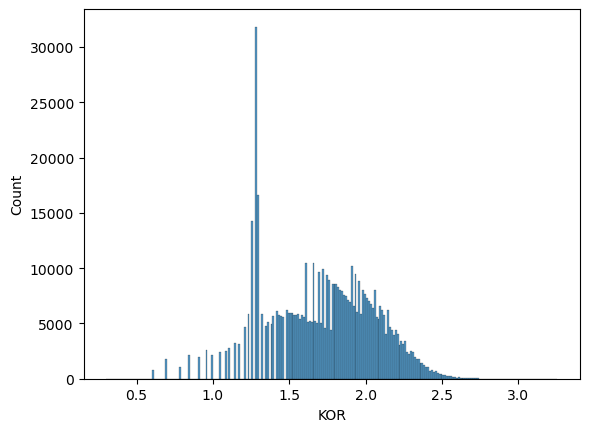

In [14]:
import seaborn as sns

sns.histplot(np.log10(df.KOR.apply(len)))
plt.show()

In [138]:
df.KOR.apply(lambda x: np.log10(len(x))).describe()

count    585946.000000
mean          1.725883
std           0.349676
min           0.301030
25%           1.462398
50%           1.755875
75%           1.986772
max           3.253096
Name: KOR, dtype: float64

In [16]:
delete_index = []
delete_index += df.loc[df.KOR.apply(len)<10**(1.5)].index.to_list()

In [17]:
df1 = df.drop(index=delete_index)
df1.sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
339181,과학ㆍ기술,기상법 시행령,8. Ceiling;,8. 구름고도(Ceiling: 하늘의 5/8 이상을 가리는 최하층 구름고도)
361543,내국세,개별소비세법,7. Omitted.,7. 「특별소비세법」 : 「특별소비세법」 제13조 및 제24조제1항제1호
361537,내국세,개별소비세법,1. Omitted;,1. 「국제조세조정에 관한 법률」 : 「국제조세조정에 관한 법률」 제13조
339183,과학ㆍ기술,기상법 시행령,10. Icing;,10. 착빙(着氷: 공기 중에 냉각된 물방울이 얼음이 되어 항공기 기체에 달라붙는 현상)


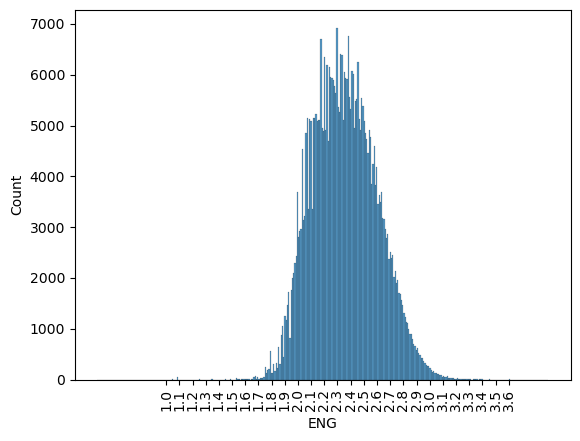

In [18]:
sns.histplot(np.log10(df1.ENG.apply(len)))
plt.xticks([i/10 for i in range(10,37)], rotation=90)
plt.show()

In [19]:
df1.loc[df1.ENG.apply(len)<10**(1.5)].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
107239,상업ㆍ무역ㆍ공업,벤처투자 촉진에 관한 법률,1. The term “investment” means:,"1. ""투자""란 다음 각 목의 어느 하나에 해당하는 것을 말한다."
307316,병무,병역법,"[Title Amended on Jun. 4, 2013]","[제목개정 2013. 6. 4., 2021. 4. 13.]"
555227,노동,산업안전보건법 시행령,5. Benzotrichloride [98-07-7];,5. 벤조트리클로라이드(Benzotrichloride; 98-07-7)
536032,환경,물환경보전법 시행령,10. Polychlorinated biphenyl;,10. 폴리염화비페닐[polychlorinated biphenyl]
382428,내국세,조세특례제한법 시행규칙,"(1) Deleted. <Mar. 18, 2022>",① 영 제93조의4제9항에서 “기획재정부령으로 정하는 주식”이란 「자본시장과 금융투...
...,...,...,...,...
339181,과학ㆍ기술,기상법 시행령,8. Ceiling;,8. 구름고도(Ceiling: 하늘의 5/8 이상을 가리는 최하층 구름고도)
361537,내국세,개별소비세법,1. Omitted;,1. 「국제조세조정에 관한 법률」 : 「국제조세조정에 관한 법률」 제13조
361539,내국세,개별소비세법,3. Omitted.,3. 「상속세 및 증여세법」 : 「상속세 및 증여세법」 제78조제1항 및 제2항
339183,과학ㆍ기술,기상법 시행령,10. Icing;,10. 착빙(着氷: 공기 중에 냉각된 물방울이 얼음이 되어 항공기 기체에 달라붙는 현상)


In [20]:
df.ENG.apply(lambda x: np.log10(len(x))).describe()

count    585946.000000
mean          2.182582
std           0.362451
min           0.301030
25%           1.929419
50%           2.214844
75%           2.451786
max           3.899766
Name: ENG, dtype: float64

In [21]:
delete_index += df1.loc[df1.ENG.apply(len)<10**(1.5)].index.to_list()
delete_index[-5:]

[555229, 571797, 577918, 579270, 580258]

In [22]:
df1 = df.drop(index=delete_index)
df1.sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
576553,정보통신,별정우체국법 시행령,[Article 44-4 Moved to Article 31],[제44조의4는 제31조로 이동 <2011. 5. 30.>]
576552,정보통신,별정우체국법 시행령,[Article 44-3 Moved to Article 45],[제44조의3은 제45조로 이동 <2011. 5. 30.>]
576551,정보통신,별정우체국법 시행령,[Article 44-2 Moved to Article 43],[제44조의2는 제43조로 이동 <2011. 5. 30.>]
576558,정보통신,별정우체국법 시행령,[Article 44-9 Moved to Article 39],[제44조의8는 제39조로 이동 <2011. 5. 30.>]


# 2.특수기호


## 2.1.`[ ]` 대괄호


In [23]:
# 영어 대괄호 -- [으로 시작하고 ]으로 끝나는 문장

df1.loc[df.ENG.str.contains('^\[[^\]]+\]')].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
548054,노동,고용보험법 시행령,[Pursuant to Article 2 (2) of the Addenda to t...,[대통령령 제25022호(2013. 12. 24.) 부칙 제2조제2항의 규정에 의하...
236027,국가공무원,국가공무원법,"[Inconsistent with the Constitution, 2020Hun-M...","[헌법불합치, 2020헌마1181, 2022.11.24, 국가공무원법(2018. 1..."
168190,사회복지,장애인활동 지원에 관한 법률,"[Inconsistency with the Constitution, 2017Hun-...","[헌법불합치, 2017헌가22, 2019헌가8(병합), 2020. 12. 23., ..."
263190,형사법,형법,[Interpreting a ‘public official’ under Articl...,"[한정위헌, 2011헌바117, 2012. 12. 27. 형법(1953. 9. 18..."
223069,선거ㆍ정당,공직선거법,"[Inconsistency with the Constitution, 2018Heon...","[헌법불합치, 2018헌마415, 2019. 2. 28. 공직선거법(2018. 3...."
...,...,...,...,...
576573,정보통신,별정우체국법 시행령,[Article 45-3 Moved to Article 52],[제45조의3은 제52조로 이동 <2011. 5. 30.>]
576572,정보통신,별정우체국법 시행령,[Article 45-2 Moved to Article 50],[제45조의2는 제50조로 이동 <2011. 5. 30.>]
576558,정보통신,별정우체국법 시행령,[Article 44-9 Moved to Article 39],[제44조의8는 제39조로 이동 <2011. 5. 30.>]
576557,정보통신,별정우체국법 시행령,[Article 44-8 Moved to Article 47],[제44조의8은 제47조로 이동 <2011. 5. 30.>]


In [24]:
# 한글 대괄호 -- [으로 시작하고 ]으로 끝나는 문장

df1.loc[df.KOR.str.contains('^\[[^\]]+\]')].sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
548054,노동,고용보험법 시행령,[Pursuant to Article 2 (2) of the Addenda to t...,[대통령령 제25022호(2013. 12. 24.) 부칙 제2조제2항의 규정에 의하...
236027,국가공무원,국가공무원법,"[Inconsistent with the Constitution, 2020Hun-M...","[헌법불합치, 2020헌마1181, 2022.11.24, 국가공무원법(2018. 1..."
223069,선거ㆍ정당,공직선거법,"[Inconsistency with the Constitution, 2018Heon...","[헌법불합치, 2018헌마415, 2019. 2. 28. 공직선거법(2018. 3...."
258346,형사법,국가보안법,"<<""If a person who was sentenced to a punishme...","[단순위헌, 2002헌가5, 2002. 11. 28. 국가보안법(1980. 12. ..."
168190,사회복지,장애인활동 지원에 관한 법률,"[Inconsistency with the Constitution, 2017Hun-...","[헌법불합치, 2017헌가22, 2019헌가8(병합), 2020. 12. 23., ..."
...,...,...,...,...
161797,사회복지,노인장기요양보험법 시행령,[Previous Article 4 moved to Article 6 <Jun. 1...,[종전 제4조는 제6조로 이동 <2008. 6. 11.>]
420986,통화ㆍ국채ㆍ금융,특정 금융거래정보의 보고 및 이용 등에 관한 법률,[Previous Article 6 moved to Article 9 <Mar. 2...,[종전 제6조는 제9조로 이동 <2020. 3. 24.>]
311573,국가보훈,국가유공자 등 예우 및 지원에 관한 법률,"[Title Amended on Feb. 6, 2009; Sep. 15, 2011]","[제목개정 2009. 2. 6., 2011. 9. 15.]"
267674,지방제도,국가균형발전 특별법,"[Title Amended on Jan. 7, 2014; Mar. 20, 2018]","[제목개정 2014. 1. 7., 2018. 3. 20.]"


In [25]:
eng_ll = set(df1.loc[df.ENG.str.contains('^\[[^\]]+\]')].index.to_list())
kor_ll = set(df1.loc[df.KOR.str.contains('^\[[^\]]+\]')].index.to_list())
ll_indexes = list(eng_ll.union(kor_ll))
len(ll_indexes)

2479

In [26]:
df1.drop(index=ll_indexes).sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
191761,노동,국가기술자격법 시행령,(1) Notwithstanding Article 10 (2) and attache...,① 제10조제2항 및 별표 1의 규정에 불구하고 기술ㆍ기능분야 국가기술자격의 응시자...
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
229940,행정일반,정부출연연구기관 등의 설립ㆍ운영 및 육성에 관한 법률,(1) Research institutes listed on the left col...,① 이 법 시행당시 다음 표의 좌란에 규정된 연구기관은 우란에 규정된 이 법에 의하...
233872,국가공무원,공무원임용령,(2) Public officials of class V or below of th...,② 이 영 시행당시 별표 1중 공안직군의 교정ㆍ검찰사무ㆍ마약수사ㆍ출입국관리ㆍ철도공안...
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
...,...,...,...,...
37092,군사,6ㆍ25전쟁 전후 적 지역에서 활동한 비정규군 공로자 보상에 관한 법률 시행령,"2. Joint Advisory Commission, Korea;",2. 미국 중앙정보국(Central Intelligence Agency) 첩보부대
364464,내국세,국세징수법,10. Unpublished inventions or works;,10. 발명 또는 저작에 관한 것으로서 공표되지 아니한 것
404351,통화ㆍ국채ㆍ금융,신용정보의 이용 및 보호에 관한 법률 시행령,2. Social Network Service address;,2. 사회 관계망 서비스(Social Network Service) 주소
384589,내국세,조세특례제한법 시행령,(2) Whether the period of continuo,② 법 제96조의2제1항제2호에 따른 해당 과세연도 개시일 현재 동일한 임차인에게 ...


In [27]:
df1.drop(index=ll_indexes).sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
585005,정보통신,통신비밀보호법,1. Part II of the Criminal Act - Chapter I Cri...,"1. 형법 제2편중 제1장 내란의 죄, 제2장 외환의 죄중 제92조 내지 제101조..."
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(3) The authority of the Minister of Employmen...,"③ 「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산..."
273723,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「건축법」 제4조제5항, 제5조제1항, 제6조, 제8조, 제12조제1항, 제13..."
...,...,...,...,...
357403,재정ㆍ경제일반,약관의 규제에 관한 법률,(6) The term of office of the Committee member...,"⑥ 협의회 위원의 임기는 3년으로 하되, 연임할 수 있다."
230383,행정일반,행정규제기본법,2. Where he/she is unable to carry out his/her...,2. 장기간의 심신쇠약으로 직무를 수행할 수 없게 된 경우
18480,민사법,상법시행법,(3) Article 346 (2) of the Commercial Act shal...,③ 상법 제346조제2항의 규정은 전항의 경우에 준용한다.
439635,수산,낚시 관리 및 육성법,15. A person who fails to refuse boarding of p...,15. 제33조제4항을 위반하여 승선을 거부하지 아니한 자


In [145]:
print(len(df4.loc[df4.KOR.str.contains(r"\[[^\]]+\]")].index))
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
for i in df4.loc[df4.KOR.str.contains(r"\[[^\]]+\]")].index:
    print(i)
    print(df4.loc[i, "KOR"])
    print(df4.loc[i, "ENG"])
    print("________________________________")

1164
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
770
3. 협력사업 계획서[협력사업의 업종이 「통계법」 제22조제2항에 따라 통계청장이 고시하는 산업 등에 관한 표준분류(이하 “한국표준산업분류”라 한다)에 따른 제조업인 경우만 첨부한다]
3. Plans for cooperative projects [limited to cases where the specific industry of the cooperative project is the manufacturing industry under the standard classification on the industries publicly notified by the Commissioner of the Korea National Statistics Office pursuant to Article 22 (2) of the Statistics Act (hereinafter referred to as "Korea Standard Industrial Classification")];
________________________________
2675
① 위원회는 안건을 심사할 때 먼저 그 취지의 설명과 전문위원의 검토보고를 듣고 대체토론[안건 전체에 대한 문제점과 당부(當否)에 관한 일반적 토론을 말하며 제안자와의 질의ㆍ답변을 포함한다]과 축조심사 및 찬반토론을 거쳐 표결한다.
(1) In examining any bill, the committee shall hear an explanation on its purpose, and a report of the Deputy Chief of Staff on the examination, and take a vote thereon through a general discussion (referring to a general discussion about problems as to the whole bill a

## 2.2.`< >` 꺾쇠 괄호 처리

In [28]:
df_temp = df1.drop(index=ll_indexes)

## < 로 시작하는 경우
df_temp.loc[df_temp.ENG.str.contains(r"^<")]

,category,lawName,ENG,KOR
18760,민사법,입양특례법,"<<Enforcement Date: Jul. 1, 2022>> Article 6",삭제 <2020. 12. 29.>[시행일 : 2022. 7. 1.] 제6조


In [29]:
## < 이 포함되는 경우

df_temp.loc[df_temp.ENG.str.contains("<")].ENG.apply(lambda x: x.index("<")).sort_values(ascending=False)

273760    4084
191061    3601
273697    3091
232050    2967
280171    2704
          ... 
356436      12
330432      11
20851       11
519641       7
18760        0
Name: ENG, Length: 100024, dtype: int64

In [30]:
df_temp.loc[280171, "KOR"]

'① 「공익사업을 위한 토지 등의 취득 및 보상에 관한 법률」, 「국토의 계획 및 이용에 관한 법률」, 「도시개발법」 등 관계 법령에 따라 토지 등을 수용할 수 있는 사업인정을 받은 자(「관광진흥법」 제55조제1항에 따른 조성계획의 승인을 받은 자 및 「농어촌정비법」 제56조에 따른 농어촌정비사업 시행자를 포함한다)에게 부동산(선박ㆍ어업권ㆍ양식업권 및 광업권을 포함한다. 이하 이 조에서 "부동산등"이라 한다)이 매수, 수용 또는 철거된 자(「공익사업을 위한 토지 등의 취득 및 보상에 관한 법률」이 적용되는 공공사업에 필요한 부동산등을 해당 공공사업의 시행자에게 매도한 자 및 같은 법 제78조제1항부터 제4항까지 및 제81조에 따른 이주대책의 대상이 되는 자를 포함한다)가 계약일 또는 해당 사업인정 고시일(「관광진흥법」에 따른 조성계획 고시일 및 「농어촌정비법」에 따른 개발계획 고시일을 포함한다) 이후에 대체취득할 부동산등에 관한 계약을 체결하거나 건축허가를 받고, 그 보상금을 마지막으로 받은 날(사업인정을 받은 자의 사정으로 대체취득이 불가능한 경우에는 취득이 가능한 날을 말하고, 「공익사업을 위한 토지 등의 취득 및 보상에 관한 법률」 제63조제1항에 따라 토지로 보상을 받는 경우에는 해당 토지에 대한 취득이 가능한 날을 말하며, 같은 법 제63조제6항 및 제7항에 따라 보상금을 채권으로 받는 경우에는 채권상환기간 만료일을 말한다)부터 1년 이내(제6조제1항에 따른 농지의 경우는 2년 이내)에 다음 각 호의 구분에 따른 지역에서 종전의 부동산등을 대체할 부동산등을 취득하였을 때(건축 중인 주택을 분양받는 경우에는 분양계약을 체결한 때를 말한다)에는 그 취득에 대한 취득세를 면제한다. 다만, 새로 취득한 부동산등의 가액 합계액이 종전의 부동산등의 가액 합계액을 초과하는 경우에 그 초과액에 대해서는 취득세를 부과하며, 초과액의 산정 기준과 방법 등은 대통령령으로 정한다. <개정 2010. 12. 27., 2015. 12. 29., 2016. 12. 27., 20

In [31]:
df_temp.loc[(df_temp.lawName=="소득세법 시행령")&(df_temp.ENG.str.contains("Where a person who has subscribed"))].iloc[0, 3]

'② 이 영 시행전에 청약부금에 가입한 자가 이 영 시행후 청약부금을 해지하고 다시 가입한 때에는 제1항의 규정을 적용하지 아니한다.'

In [32]:
df_temp.loc[(df_temp.lawName=="소득세법 시행령")&(df_temp.ENG.str.contains("Where a person who has subscribed"))].iloc[0, 2]

'(2) Where a person who has subscribed for the installment savings sub-'

In [33]:
## > 로 끝나는 경우
import re

pattern = r"\<[^\>]+\>$"
re.sub(pattern, "", "<Amended by Act No. 10417, Dec. 27, 2010; Act No. 13637, Dec. 29, 2015; Act No. 14477, Dec. 27, 2016; Act No. 16568, Aug. 27, 2019>")

df_temp.loc[df_temp.ENG.str.contains(r"\<[^\<]*\>$")].sort_values(by="ENG", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(3) The authority of the Minister of Employmen...,"③ 「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산..."
232050,국가공무원,공무원수당 등에 관한 규정,"(5) No special area service allowance, dangero...",⑤ 강등ㆍ정직ㆍ직위해제 또는 휴직(공무상 질병 또는 부상으로 인한 휴직은 제외한다)...
280171,지방제도,지방세특례제한법,(1) Where a person (including persons who have...,"① 「공익사업을 위한 토지 등의 취득 및 보상에 관한 법률」, 「국토의 계획 및 이..."
...,...,...,...,...
460687,상업ㆍ무역ㆍ공업,중소기업협동조합법,(2) Promotion plans shall include: <Amended on...,② 추진계획에는 다음 각 호의 사항이 포함되어야 한다. <개정 2017. 7. 26.>
328411,문화ㆍ공보,무형문화재 보전 및 진흥에 관한 법률,(2) ICHCAP shall be a corporation. <Amended on...,② 유네스코 아ㆍ태무형유산센터는 법인으로 한다. <개정 2020. 12. 8.>
346667,과학ㆍ기술,한국과학기술원법,(1) KAIST shall have a president. <Amended on ...,① 과학기술원에 총장을 둔다. <개정 2009. 2. 6.>
207445,해운,신항만건설 촉진법,Each master plan shall include: <Amended on Oc...,기본계획에는 다음 각 호의 사항이 포함되어야 한다. <개정 2017. 10. 31.>


In [34]:
df_temp.loc[df_temp.KOR.str.contains(r"\<[^\<]*\>$")].sort_values(by="KOR", ascending=False, key=lambda col: col.apply(len))

,category,lawName,ENG,KOR
273760,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「도시 및 주거환경정비법」 제2조제3호나목, 같은 호 다목1) 및 2) 외의 부..."
191061,노동,교원의 노동조합 설립 및 운영 등에 관한 법률,(1) Except as otherwise expressly provided for...,① 교원(제4조의2제2호에 해당하는 사람을 포함한다)에 적용할 노동조합 및 노동관계...
273697,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(3) The authority of the Minister of Employmen...,"③ 「고용보험법」 제20조(일자리 함께하기, 시간선택제고용, 성장유망업종ㆍ지역특화산..."
273723,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(2) Matters to be prescribed by Presidential D...,"② 「건축법」 제4조제5항, 제5조제1항, 제6조, 제8조, 제12조제1항, 제13..."
273854,지방제도,제주특별자치도 설치 및 국제자유도시 조성을 위한 특별법,(5) Matters to be prescribed by Presidential D...,"⑤ 「공유수면 관리 및 매립에 관한 법률」 제5조제1호, 제6조제1항 각 호 외의 ..."
...,...,...,...,...
225269,선거ㆍ정당,공직선거법,(1) This Act shall enter into force on April 1...,① 이 법은 1998년4월1일부터 시행한다. <단서 생략>
102699,수산,어촌·어항법,(2) The Public Agency shall be a corporation. ...,② 공단은 법인으로 한다. <개정 2018. 4. 17.>
328600,문화ㆍ공보,문화재보호법,(2) The Foundation shall be a juristic person....,② 재단은 법인으로 한다. <개정 2014. 5. 28.>
149359,보건·의사,식품위생법,(2) The Information Service shall be a corpora...,② 정보원은 법인으로 한다. <개정 2011. 8. 4.>


In [35]:
df_temp.loc[(df_temp.KOR.str.contains(r"\<[^\<]*\>$"))&(~df_temp.ENG.str.contains(r"\<[^\<]*\>$"))]

,category,lawName,ENG,KOR
3432,국회,국회사무처법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다. <단서 생략>
5082,행정일반,공공기록물 관리에 관한 법률 시행령,(3) Where any error is discovered through an e...,③ 제2항에 따른 상태검사를 통하여 오류사항이 발견된 경우에는 즉시 복구해야 한다....
7429,행정일반,약식절차 등에서의 전자문서 이용 등에 관한 법률,"(5) A court shall, upon receipt of a claim for...",⑤ 법원은 제2항에 따라 약식명령이 청구된 경우 약식명령이나 그 밖의 소송에 관한 ...
8933,행정일반,행정절차법,"(1) Where parties, etc. have appointed or desi...",① 당사자등이 대표자 또는 대리인을 선정하거나 선임하였을 때에는 지체 없이 그 사실...
9834,국가공무원,공무원 성과평가 등에 관한 규정,This Decree shall apply to the state public of...,이 영은 일반직(연구직ㆍ지도직공무원과 전문직공무원을 포함한다) 국가공무원에 대하여 ...
...,...,...,...,...
578786,정보통신,이동통신단말장치 유통구조 개선에 관한 법률,(6) When the Korea Communications Commission r...,⑥ 방송통신위원회는 이동통신단말장치 제조업자가 제1항을 위반하는 행위를 한다고 신고...
585148,정보통신,통신비밀보호법,(7) Except as provided in paragraphs (1) throu...,⑦ 제1항부터 제5항까지에서 규정한 사항 외에 통신사실 확인자료제공을 받은 사실 등...
585190,정보통신,통신비밀보호법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다. <단서 생략>
585559,외무,재외공관 공증법,"(6) Where there is an insertion, deletion, rev...","⑥ 사서증서에 글자의 삽입·삭제·변경이 있거나, 칸 밖에 적힌 글자 또는 정정된 부..."


In [36]:
df_temp.loc[(~df_temp.KOR.str.contains(r"\<[^\<]*\>$"))&(df_temp.ENG.str.contains(r"\<[^\<]*\>$"))]

,category,lawName,ENG,KOR
4424,행정일반,개인정보 보호법 시행령,(1) “Manner prescribed by Presidential Decree”...,① 법 제27조제1항 각 호 외의 부분과 같은 조 제2항 본문에서 “대통령령으로 정...
5228,행정일반,공공기록물 관리에 관한 법률 시행령,2. Any of the following persons who have passe...,2. 다음 각 목의 어느 하나에 해당하는 사람으로서 행정안전부령으로 정하는 기록관리...
12304,국가공무원,부패방지 및 국민권익위원회의 설치와 운영에 관한 법률 시행령,Any person who intends to request measures to ...,법 제62조의2제1항에 따른 신분보장등조치(이하 “신분보장등조치”라 한다)를 신청하...
12624,법원,각급 법원의 설치와 관할구역에 관한 법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 1월 1일부터 시행한다. 다만, 울산지방법원의 설..."
12625,법원,각급 법원의 설치와 관할구역에 관한 법률,(2) (Transitional Measures concerning Jurisdic...,② (사건관할에 관한 경과조치) 1997년 12월 31일 현재 대전지방법원 강경지원...
...,...,...,...,...
570341,해운,선박평형수 관리법,(3) The Minister of Oceans and Fisheries may c...,③ 해양수산부장관은 제1항에 따른 확인ㆍ점검의 결과 제2항 단서에 따른 명백한 근거...
570417,해운,선박평형수 관리법,(2) Where an agency intends to collect fees pu...,② 대행기관이 제1항 단서에 따라 수수료를 징수하는 경우에는 그 기준을 정하여 해양...
577816,정보통신,우체국예금·보험에 관한 법률,(2) The Minister of Science and ICT may allow ...,② 제1항에 따른 시설은 보험계약자등 외의 자에게도 이용하게 할 수 있다.
578761,정보통신,이동통신단말장치 유통구조 개선에 관한 법률,(1) The Korea Communications Commission shall ...,"① 방송통신위원회는 가입자 평균 예상 이익, 이동통신단말장치 판매 현황, 통신시장의..."


In [37]:
prep_gls_kor = df_temp.KOR.apply(lambda x: re.sub(r"\<[^\<]*\>$", "", x).strip(" "))
prep_gls_eng = df_temp.ENG.apply(lambda x: re.sub(r"\<[^\<]*\>$", "", x).strip(" "))
df_temp.KOR = prep_gls_kor
df_temp.ENG = prep_gls_eng

df_temp

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,이 법에서 사용하는 용어의 정의는 다음과 같다.
2,헌법,개성공업지구 지원에 관한 법률,1. The term “Gaeseong Industrial Complex” or “...,1. “개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 ...
3,헌법,개성공업지구 지원에 관한 법률,2. The term “GIC developer” means a South Kore...,2. “개성공업지구 개발업자”란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인...
4,헌법,개성공업지구 지원에 관한 법률,3. The term “GIC management organ” means a cor...,3. “개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공...
...,...,...,...,...
585938,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주허가를 받은 자등에 관한 경과조치) 이 법 시행전에 종전의 규정에 의하...
585940,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의...
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585942,외무,해외이주법,(2) (Transitional Measures on Emigration Agent...,② (해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이...


In [38]:
for i in df_temp.loc[df_temp.KOR.str.contains("<")].index:
    print(df_temp.loc[i, "ENG"])
    print(df_temp.loc[i, "KOR"])
    print(i)
    print("_______________________________________")
    
'''
Deleted Index
    965, 18760
    
Modify Index
    70457:       <개정 2000. 1. 12., 2001. 3. 28.>[시행일 2001. 3. 28.]     //이 부분 삭제 (띄어쓰기 포함)
    225687:     <16> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)
    225688:     <17> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)
    352430:      <개정 2005. 1. 27.>[본조신설 1964ㆍ12ㆍ31]                 //이 부분 삭제 (띄어쓰기 포함)
    367840:      <개정 2000. 12. 29.>                                      //이 부분 삭제 (띄어쓰기 포함)
    380995:      <신설 2007. 12. 31., 2008. 2. 29., 2009. 1. 30., 2010. 10. 27., 2013. 3. 23.>]     //이 부분 삭제 (띄어쓰기 포함)
    399244:      <개정 2008.2.29>부칙                                      //이 부분 삭제 (띄어쓰기 포함)
    
Rule Based Drop
    생략:별표 --> 행 삭제
    ㆍㆍㆍ --> replace("···")
'''

(1) The national flag is composed of one taegeuk circle (or Yin and Yang) at the center and four trigrams (or gwae) called "gun," "gon," "gam," and "ri" respectively, one at each corner.
① 국기는 가운데의 태극(태극)과 네 모서리의 건곤감리<img id="11371789">(건:?, 곤:?, 감:?, 리:?)</img> 4괘(괘)로 구성한다.
965
_______________________________________
<<Enforcement Date: Jul. 1, 2022>> Article 6
삭제 <2020. 12. 29.>[시행일 : 2022. 7. 1.] 제6조
18760
_______________________________________
1. The amended provisions of Article 7 of the Addenda ··· <omitted> ··· (excluding paragraphs (3) and (4) of that Article): January 1, 2023;
1. ㆍㆍㆍ<생략> ㆍㆍㆍ부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정규정: 2023년 1월 1일
52139
_______________________________________
(3) Where an accounting corporation is to be established on December 31, 1997 after this Act takes effect, it may be established with the total number of directors and member accountants not exceeding 10 people and capital of not less than 500 million won.
③ 이 법 시행이후 1997년 12월 31일까지 회계법인을 설립하는 경우에

'\nDeleted Index\n    965, 18760\n    \nModify Index\n    70457:       <개정 2000. 1. 12., 2001. 3. 28.>[시행일 2001. 3. 28.]     //이 부분 삭제 (띄어쓰기 포함)\n    225687:     <16> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)\n    225688:     <17> -> 원문자 변환 (나중에 삭제 시 용이하게 하기 위해)\n    352430:      <개정 2005. 1. 27.>[본조신설 1964ㆍ12ㆍ31]                 //이 부분 삭제 (띄어쓰기 포함)\n    367840:      <개정 2000. 12. 29.>                                      //이 부분 삭제 (띄어쓰기 포함)\n    380995:      <신설 2007. 12. 31., 2008. 2. 29., 2009. 1. 30., 2010. 10. 27., 2013. 3. 23.>]     //이 부분 삭제 (띄어쓰기 포함)\n    399244:      <개정 2008.2.29>부칙                                      //이 부분 삭제 (띄어쓰기 포함)\n    \nRule Based Drop\n    생략:별표 --> 행 삭제\n    ㆍㆍㆍ --> replace("···")\n'

In [39]:
## drop index
drop_idx = [965, 18760]

## modify index
p1 = r"\s\<개정 2000. 1. 12., 2001. 3. 28.\>\[시행일 2001. 3. 28.\]"
p2 = r"\s\<개정 2005. 1. 27.\>\[본조신설 1964ㆍ12ㆍ31\]"
p3 = r"\s\<개정 2000. 12. 29.\>"
p4 = r"\s\<신설 2007. 12. 31., 2008. 2. 29., 2009. 1. 30., 2010. 10. 27., 2013. 3. 23.\>\]"
p5 = r"\s\<개정 2008.2.29\>부칙"
del_patterns = "|".join([p1, p2, p3, p4, p5])

cir_num_16 = r"\<16\>"  # chr(9327)
cir_num_17 = r"\<17\>"  # chr(9328)

## 생략:별표 케이스 제거 (행)
drop_idx += df_temp.loc[df_temp.KOR.str.contains("생략:별표")].index.to_list()

## ㆍㆍㆍ --> replace("···")
df_temp.KOR.apply(lambda x: x.replace("ㆍㆍㆍ", "···"))

## Total
df2 = df_temp.drop(index=drop_idx)
df2.KOR = df2.KOR.apply(lambda x: re.sub(del_patterns, "", x).strip(" "))
df2.KOR = df2.KOR.apply(lambda x: re.sub(cir_num_16, chr(9327), x))
df2.KOR = df2.KOR.apply(lambda x: re.sub(cir_num_17, chr(9328), x))
df2.KOR = df2.KOR.apply(lambda x: x.replace("ㆍㆍㆍ", "···"))

df2.loc[df2.KOR.str.contains("<")]

,category,lawName,ENG,KOR
52139,교육ㆍ학술,초·중등교육법 시행령,1. The amended provisions of Article 7 of the ...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...
97088,산림,목재의 지속가능한 이용에 관한 법률,(2) The Acts amended by Article 6 of this Adde...,② 부칙 제6조에 따라 개정되는 법률 중 이 법의 시행 전에 공포되었으나 시행일이 ...
347774,재정ㆍ경제일반,공기업의경영구조개선및민영화에관한법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업..."
442382,상업ㆍ무역ㆍ공업,기업활동 규제완화에 관한 특별조치법,"1. Article 2 (7), ··· <omitted> ··· Article 4 ...","1. 제2조제7항, ···<생략>···부칙 제4조(제9항을 제외한다)···<생략>·..."
519641,사회복지,국민건강보험법 시행령,1. ··· <omitted> ··· The amended provisions of...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...


In [40]:
df2.loc[df2.KOR.str.contains(">")]

,category,lawName,ENG,KOR
52139,교육ㆍ학술,초·중등교육법 시행령,1. The amended provisions of Article 7 of the ...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...
97088,산림,목재의 지속가능한 이용에 관한 법률,(2) The Acts amended by Article 6 of this Adde...,② 부칙 제6조에 따라 개정되는 법률 중 이 법의 시행 전에 공포되었으나 시행일이 ...
347774,재정ㆍ경제일반,공기업의경영구조개선및민영화에관한법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업..."
442382,상업ㆍ무역ㆍ공업,기업활동 규제완화에 관한 특별조치법,"1. Article 2 (7), ··· <omitted> ··· Article 4 ...","1. 제2조제7항, ···<생략>···부칙 제4조(제9항을 제외한다)···<생략>·..."
519641,사회복지,국민건강보험법 시행령,1. ··· <omitted> ··· The amended provisions of...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...


In [41]:
re.sub(r".$", "", "<Amended on Mar. 31, 2020; Jul. 5, 2022>.")
re.sub(r"\"$", "", '<Amended on Mar. 31, 2020; Jul. 5, 2022>"')

'<Amended on Mar. 31, 2020; Jul. 5, 2022>'

In [109]:
df_t2 = df2.copy()

df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\.$|\"$|\:$", "", x).strip(" "))
df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^\>]*\>$", "", x).strip(" "))
df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^＞]*＞$", "", x).strip(" "))
df_t2.ENG = df_t2.ENG.apply(lambda x: re.sub(r"\<[^\>]*\>$", "", x).strip(" "))

In [110]:
for i in df_t2.loc[df_t2.ENG.str.contains("<")].index:
    print(df_t2.loc[i, "ENG"])
    print(df_t2.loc[i, "KOR"])
    print(i)
    print("________________________________________")
    
'''
Delete Index
    20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 383998, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917

Modify Index

    *309289: < serviceme
    *374213: <Amended by Act No
    *291075, 368475, 427804, 427804: < ?
    
    *139625, 181172, 280336, 280336, 377065, 385326, 401208: <
    *142354, 290930: <Amended on Jun. 8, 2018; Nov. 26, 2019)
    *352430: < ]
    *362943: < T
    *423648, 571352: < <
    *467452: < 〉
    *497196, 544793: < ,
    *566262: < v
Rule Based Drop
    *62054, 228122, 289465: < 로 시작해서 숫자로 끝남
    KOR -> x.replace("…", "...")

'''

"Person... <omitted> ...in a special relationship, the scope of which is prescribed by Presidential Decree" in Article 101 (1), subparagraphs of Article 218 (2), and Article 392 (1) of the Act means any of the following persons
법 제101조제1항, 법 제218조제2항 각 호 및 법 제392조제1항에서 "대통령령이 정하는 범위의 특수관계에 있는 자"라 함은 다음 각 호의 어느 하나에 해당하는 자를 말한다.
20851
________________________________________
(1) This Act shall enter into force three months after the date of its promulgation: Provided, That ... <omitted> ... amendments to Acts already promulgated but not yet enforced before this Act enters into force among Acts amended pursuant to Article 6 of the Addenda shall enter into force on the enforcement dates of the respective relevant Acts
① 이 법은 공포한 날부터 시행한다. 다만, 부칙 제5조에 따라 개정되는 법률 중 이 법 시행 전에 공포되었으나 시행일이 도래하지 아니한 법률을 개정한 부분은 각각 해당 법률의 시행일부터 시행한다.
29166
________________________________________
“Quantity which ... <Omitted> ... is determined by Presidential Decree” in Article 2 (1) 2 of the Act means quantity p

'\nDelete Index\n    20851, 29166, 35250, 35281, 114646, 130584, 131334, 246676, 284875, 330431, 330432, 356436, 377208, 383998, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917\n\nModify Index\n\n    309289: <Newly Inserted on Sep. 22, 2017; Oct. 14, 2021> ---\n            (The previous mandatory service period ? The number of days served) ÷ The previous mandatory service period × The mandatory service period of active duty serviceme\n    374213: <Amended by Act No\n    291075, 427804, 368475: <Amended by Act No. 11693, Mar. 23, 2013; Act No. 14513, Dec. 27, 2016; Act No. 15771, Sep. 18, 2018>?\n    535247: <Amended on Jan. 29, 2014; Jan. 19, 2017> 1\n    \n    139625, 181172, 280336, 280336: <\n    142354, 290930: <Amended on Jun. 8, 2018; Nov. 26, 2019)\n    352430: <로 시작 ]로 끝남\n    362943: <로 시작 T로 끝남\nRule Based Drop\n    62054, 228122, 289465: < 로 시작해서 숫자로 끝남\n    KOR -> x.replace("…", "...")\n\n'

In [119]:
## drop index

drop_idx = [20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 383998, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917]
df3 = df_t2.drop(index=drop_idx)
## Modify Index
'''
Delete Index
    20851, 29166, 35250, 35281, 114646, 130584, 131334, 284875, 330431, 330432, 356436, 377208, 383998, 384374, 384544, 415853, 418726, 498424, 539857, 539858, 539917

Modify Index
    *309289: < serviceme
    *374213: <Amended by Act No
    *291075, 368475, 427804, 427804: < ?
    *142354, 290930: < )
    *352430: < ]
    *362943: < T
    *423648, 571352: < <
    *467452: < 〉
    *497196, 544793: < ,
    *566262: < v
    
    *139625, 181172, 280336, 280336, 377065, 385326, 401208: <
    
Rule Based Drop
    *62054, 228122, 289465: < 로 시작해서 숫자로 끝남
    KOR -> x.replace("…", "...")
'''
p1 = r"\<[^ㄱ-ㅎ]+serviceme"
p2 = r"\<Amended by Act No"
p3 = r"\<[^ㄱ-ㅎ]+\?$"
p4 = r"\<[^ㄱ-ㅎ]+\)$"
p5 = r"\<[^ㄱ-ㅎ]+\]$"
p6 = r"\<[^ㄱ-ㅎ]+T$"
p7 = r"\<[^ㄱ-ㅎ]+\<$"
p8 = r"\<[^ㄱ-ㅎ]+〉$"
p9 = r"\<[^ㄱ-ㅎ]+\,$"
p10 = r"\<[^ㄱ-ㅎ]+v$"
del_patterns = "|".join([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10])

df3.ENG = df3.ENG.apply(lambda x: re.sub(del_patterns, "", x).strip(" "))
df3.ENG = df3.ENG.apply(lambda x: x.rstrip("<").strip(" "))

## Rule Based
df3.ENG = df3.ENG.apply(lambda x: x.replace("…", "..."))
df3.ENG = df3.ENG.apply(lambda x: re.sub(r"\<Amended[^ㄱ-ㅎ]+\d$|\<Newly[^ㄱ-ㅎ]+\d$", "", x).strip(" "))

In [120]:
for i in df3.loc[df3.ENG.str.contains("<")].index:
    print(df3.loc[i, "ENG"])
    print(df3.loc[i, "KOR"])
    print(i)
    print("_________________________________________")

1. The amended provisions of Article 7 of the Addenda ··· <omitted> ··· (excluding paragraphs (3) and (4) of that Article): January 1, 2023;
1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정규정: 2023년 1월 1일
52139
_________________________________________
(1) (Enforcement Date) This Act shall enter into force on April 1, 1998: Provided, That ... <Omitted> ... the amended provisions of Article 6 (3) of the Addenda to the Act on the Improvement of Managerial Structure and Privatization of Public Enterprises (Act No. 5379) shall enter into force on the date of its promulgation
① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업의경영구조개선 및민영화에관한법률 부칙(法律 第5379號) 제6조제3항의 개정규정은 공포한 날부터 시행한다.
347774
_________________________________________
1. Article 2 (7), ··· <omitted> ··· Article 4 of the Addenda (excluding paragraph (9)) ··· <omitted> ··· shall enter into force on the date the Presidential Decree on the organization of the National Emergency Management Agency enters into force in accordance with the 

In [123]:
for i in df3.loc[(df3.ENG.str.contains(">"))& ~df3.ENG.str.contains("omitted")].index:
    print(df3.loc[i, "ENG"])
    print(df3.loc[i, "KOR"])
    print(i)
    print("________________________________________")

(2) 　Where a person running his or her livestock breeding business defined in subparagraph 8 of Article 2 of the Livestock Industry Act ships edible eggs, he or she shall issue specifications on transactions describing egg-laying date, etc. as prescribed by Ordinance of the Prime Minister. ＜Newly Inserted on Oct. 24, 2017>
② 「축산법」 제2조제8호에 따른 가축사육업을 경영하는 자가 식용란을 출하하는 때에는 총리령으로 정하는 바에 따라 산란일 등을 포함한 거래명세서를 발급하여야 한다.
95139
________________________________________
(3) A term of office of the head of an agency shall be determined by the head of a controlling central administrative agency, not to exceed five years, but not less than two years. In such cases, where business performance is deemed excellent according to the results of business performance assessment of the relevant affiliated responsible administrative agency conducted under Article 12 and 51 (hereinafter referred to as the “assessment results of a responsible administrative agency”), the term of office may be extended on the co

In [130]:
drop_index = [427804]

p1 = r"＜[^ㄱ-ㅎ]+\>$"
p2 = r"Newly[^ㄱ-ㅎ]+\?$"
p3 = r"Newly[^ㄱ-ㅎ]+\>$"
p4 = r"Amended[^ㄱ-ㅎ]+\>$"

del_patterns = "|".join([p1, p2, p3, p4])

df_t3 = df3.drop(index=drop_index)
df_t3.ENG = df_t3.ENG.apply(lambda x: re.sub(del_patterns, "", x).strip(" "))

df_t3.loc[df_t3.ENG.str.contains(">")]

,category,lawName,ENG,KOR
52139,교육ㆍ학술,초·중등교육법 시행령,1. The amended provisions of Article 7 of the ...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...
347774,재정ㆍ경제일반,공기업의경영구조개선및민영화에관한법률,(1) (Enforcement Date) This Act shall enter in...,"① (시행일) 이 법은 1998년 4월 1일부터 시행한다. 다만, …<생략>…공기업..."
442382,상업ㆍ무역ㆍ공업,기업활동 규제완화에 관한 특별조치법,"1. Article 2 (7), ··· <omitted> ··· Article 4 ...","1. 제2조제7항, ···<생략>···부칙 제4조(제9항을 제외한다)···<생략>·..."
519641,사회복지,국민건강보험법 시행령,1. ··· <omitted> ··· The amended provisions of...,1. ···<생략> ···부칙 제7조(같은 조 제3항 및 제4항은 제외한다)의 개정...


In [132]:
for i in df_t3.loc[df_t3.ENG.str.contains("＜")].index:
    print(df_t3.loc[i, "ENG"])
    print(df_t3.loc[i, "KOR"])
    print("____________________________________")

(2) “An enterprise prescribed by Presidential Decree” in the provisions, with the exception of the subparagraphs, of Article 8 (2) of the Act means any of the following enterprises: ＜Amended on May 6, 2015＞
② 법 제8조제2항 각 호 외의 부분에서 “대통령령으로 정하는 기업”이란 다음 각 호의 어느 하나에 해당하는 기업을 말한다.
____________________________________
(2) The term of office for the members commissioned pursuant to Article 9 (4) 5 and 6 of the Act shall be two years, renewable for only once. ＜Amended on Nov. 4, 2014＞
② 법 제9조제4항제5호 및 제6호에 따라 위촉된 위원의 임기는 2년으로 하며, 한 차례만 연임할 수 있다.
____________________________________
(1) Subcommittees by field referred to in Article 10 of the Act and matters to be deliberated on and coordinated by each subcommittee shall be as follows: ＜Amended on Nov. 4, 2014; Sep. 24, 2019＞
① 법 제10조의 규정에 의한 분야별 분과위원회와 각 분과위원회의 심의ㆍ조정사항은 다음 각 호와 같다.
____________________________________


In [135]:
df4 = df_t3.copy()
df4.ENG = df4.ENG.apply(lambda x: re.sub("＜[^ㄱ-ㅎ]+＞$", "", x).strip(" "))
df4.loc[df4.ENG.str.contains("＞")]

,category,lawName,ENG,KOR


In [136]:
df4.loc[df4.ENG.str.contains("＜")]

,category,lawName,ENG,KOR


In [137]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421591 entries, 0 to 585943
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  421591 non-null  object
 1   lawName   421591 non-null  object
 2   ENG       421591 non-null  object
 3   KOR       421591 non-null  object
dtypes: object(4)
memory usage: 32.2+ MB
